In [100]:
import pandas as pd
import torch
from torch import nn
from torch import optim
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pickle

In [101]:
#bestand met de data laden
data_file = pd.read_table('../Data/data_2rounds', sep = ",", index_col = 0)

In [102]:
#Eerste blik op de data
data_file.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,7.4565,6.8632,8.4021,10.2755,12.9451,9.7520,5.7550,5.8843,3.9540,20.0,20.0,5.2561,2.7631,4.3158,5.5333,1.4624,-32.0,0.966667
1,7.4570,6.8637,8.4026,10.2759,12.9455,9.7523,5.7554,5.8845,3.9542,20.0,20.0,5.2564,2.7635,4.3162,5.5337,1.4628,-32.0,0.966667
2,7.4565,6.8633,8.4022,10.2756,12.9452,11.2514,5.7551,5.8844,20.0000,20.0,20.0,5.2560,2.7631,4.3157,5.5332,1.4624,-32.0,0.966667
3,7.4554,6.8621,8.4012,10.2746,12.9443,11.2507,5.7545,5.8839,20.0000,20.0,20.0,5.2550,2.7620,4.3146,5.5320,1.4612,-32.0,0.966667
4,7.4533,6.8601,8.3994,10.2729,12.9429,11.2495,5.7534,5.8832,20.0000,20.0,20.0,5.2533,2.7600,4.3126,5.5299,1.4590,-32.0,0.966667


In [103]:
#Afmetingen van de dataset bekijken
data_file = data_file.drop('17', axis=1)

In [104]:
#Samenvatting van de colommen opvragen
data_file.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.0,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000,3308.000000
mean,10.693885,8.967424,9.769526,8.566755,9.177894,7.244609,8.707776,7.357612,14.008577,20.0,16.453719,14.921087,15.125725,14.501483,13.905103,11.930902,2.303507
std,7.652275,7.376931,7.386916,7.180727,7.311107,6.133312,6.572315,5.748568,6.605551,0.0,6.392659,7.513922,7.336148,7.803161,7.936621,8.340058,13.854609
min,0.414600,0.525200,0.523800,0.618800,0.511600,0.417700,0.375900,0.339300,0.322900,20.0,0.361900,0.196700,0.209900,0.225400,0.181100,0.261600,-54.500000
25%,3.681450,3.221025,3.645825,2.777900,2.713675,3.079200,3.745200,3.610550,7.569425,20.0,20.000000,6.336300,6.655275,5.550175,5.495475,3.033000,-2.500000
50%,7.083500,5.242600,6.477100,5.751850,6.973350,5.057700,6.604600,5.511900,15.596000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,1.500000
75%,20.000000,20.000000,20.000000,20.000000,20.000000,9.314150,11.631475,8.917025,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,7.500000
max,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,53.000000


In [105]:
X = torch.Tensor(data_file.iloc[:, :-1].to_numpy())
Y = torch.Tensor(data_file.iloc[:, -1:].to_numpy())

In [106]:
print(Y[0])

tensor([-32.])


In [107]:
device = (

"cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

print(f"Using {device} device")

Using mps device


In [137]:
class lidar_sweep_1(nn.Module):

    def __init__(self, inputs_size, outputs_size):
        super().__init__()

        self.model = nn.Sequential(
                nn.Linear(inputs_size, outputs_size)
        )
    def forward(self, x):
        
        return self.model(x)

In [138]:
class lidar_sweep_2(nn.Module):

    def __init__(self, inputs_size, hidden1_size, hidden2_size, outputs_size):
        super().__init__()

        self.model = nn.Sequential(
                nn.Linear(inputs_size, hidden1_size),
                nn.Linear(hidden1_size, hidden2_size),
                nn.Linear(hidden2_size, outputs_size),
                                    )
        
    def forward(self, x):
        
        return self.model(x)

In [141]:
epochs = 100

learningRate = 0.00001

#----------------------------------------

lb = lidar_sweep_2(len(X[0]), 10, 5, len(Y[0]))


#----------------------------------------

losses = []

# Take binary cross entropy as loss function (one output interpreted as binary)
lossFunction = nn.MSELoss()

# Use stochastic gradient descent as optimizer, use weights and biases of model
gradientDescent = torch.optim.SGD(lb.parameters(), lr=learningRate)

#----------------------------------------

losses = []

for i in range(epochs):
    print(f"Start epoch: {i}")
   
    
    losses_epoch = []
    
    
    for x, y in zip(X, Y):
        
        # Reset the gradient delta's (dw, db)
        gradientDescent.zero_grad()

        # Forward step
        yhat = lb(x)

        # Compute loss
        loss = lossFunction(yhat, y)

        # Keep track of loss
        losses_epoch.append(loss.item())

        # Apply gradient descent (via backpropagation)
        loss.backward()

        # Use w += -step * dw * learnRate
        gradientDescent.step()
        
    losses.append(sum(losses_epoch) / len(X))
        
       
#----------------------------------------

Start epoch: 0
Start epoch: 1
Start epoch: 2
Start epoch: 3
Start epoch: 4
Start epoch: 5
Start epoch: 6
Start epoch: 7
Start epoch: 8
Start epoch: 9
Start epoch: 10
Start epoch: 11
Start epoch: 12
Start epoch: 13
Start epoch: 14
Start epoch: 15
Start epoch: 16
Start epoch: 17
Start epoch: 18
Start epoch: 19
Start epoch: 20
Start epoch: 21
Start epoch: 22
Start epoch: 23
Start epoch: 24
Start epoch: 25
Start epoch: 26
Start epoch: 27
Start epoch: 28
Start epoch: 29
Start epoch: 30
Start epoch: 31
Start epoch: 32
Start epoch: 33
Start epoch: 34
Start epoch: 35
Start epoch: 36
Start epoch: 37
Start epoch: 38
Start epoch: 39
Start epoch: 40
Start epoch: 41
Start epoch: 42
Start epoch: 43
Start epoch: 44
Start epoch: 45
Start epoch: 46
Start epoch: 47
Start epoch: 48
Start epoch: 49
Start epoch: 50
Start epoch: 51
Start epoch: 52
Start epoch: 53
Start epoch: 54
Start epoch: 55
Start epoch: 56
Start epoch: 57
Start epoch: 58
Start epoch: 59
Start epoch: 60
Start epoch: 61
Start epoch: 62
St

In [135]:
print(losses)

[135.80777007782984, 110.6506992685997, 102.26669512791128, 100.46257620276423, 101.32863830233859, 103.06577255557212, 104.84606105593845, 106.40763630995453, 107.73837310977069, 108.8946844119433, 109.92873518275623, 110.87414984834751, 111.74942809674086, 112.56007994881027, 113.29874804378657, 113.946995570498, 114.47870505060489, 114.86486951889493, 115.08041854589378, 115.1136969938783, 114.97707101322237, 114.71225884550263, 114.38459882652866, 114.06616059451126, 113.81720384619095, 113.67430285768765, 113.6481414535091, 113.7285072979106, 113.89139104351221, 114.10581486220822, 114.3394107529924, 114.56195688667559, 114.74815158587478, 114.87927075602587, 114.9443046849048, 114.94028918810494, 114.8716425815662, 114.74881404197798, 114.58598735140613, 114.39830008726659, 114.19944345015398, 114.00023390644438, 113.80795526285013, 113.6268085274989, 113.45889406749423, 113.30543940736327, 113.16765317445048, 113.04691700079574, 112.94514848098837, 112.86456112931853, 112.807256

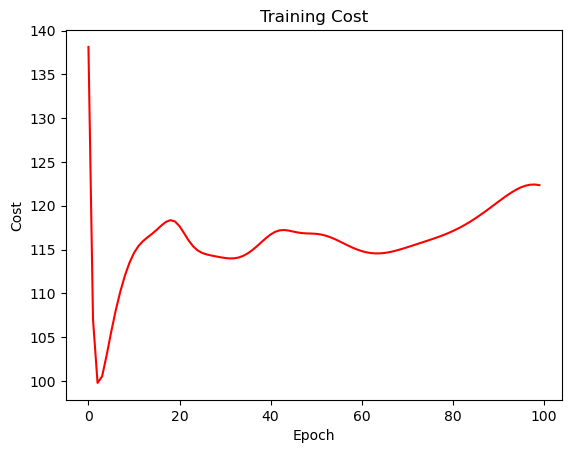

In [142]:
fig, ax = plt.subplots()
ax.set(xlabel='Epoch', ylabel='Cost', title="Training Cost")

plt.plot([x for x in range(len(losses))], losses, 'red')
plt.show()

In [98]:
pickle.dump(lb.model, open('model.pkl', 'wb'))

In [97]:
lb(X[1600])

tensor([-3.9195], grad_fn=<AddBackward0>)